*1 Accuracy, 
*2 Area under ROC curve, 
*3 Confusion metrix, 
*4 Classification report

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 heart_disease =pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **1 Accuracy

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X= heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf, X, y, cv=5)

In [4]:
np.mean(cross_val_score)

0.8248087431693989

In [5]:
print(f"Heart Disease Classifier Cross-validation accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-validation accuracy: 82.48%


# **2 Area under ROC curve

*Area under receiver operating characteristic curve (AUC/ROC)

*Area under curve (AUC)

*ROC curves are a comparison of model's true postive rate (tpr) veruss a models false positive rate(fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model pridicts 1 when trugth is 0
* True negetive = model predicts 0 when truth is 0
* False negetive = model predicts 0 when truth is 1

In [6]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split

# create test....etc.
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

# Make pridiction with probabilities
y_probs =clf.predict_proba(X_test)

y_probs[:10] ,len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [8]:
y_probs_positive =y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [9]:
# Calculate fpr, tpr and thresholds
fpr,tpr, thresholds= roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

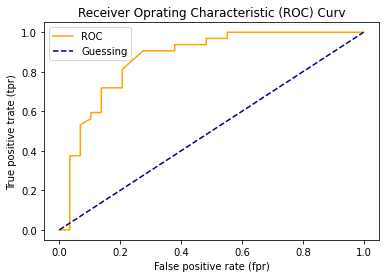

In [10]:
# Create a function for ploting ROC curves
import matplotlib.pyplot as plt

# def plot_roc_curve(fpr, tpr):
# Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of model.


# # Plot roc curve
plt.plot(fpr, tpr, color="orange", label="ROC")
# # Plot line with no predictive power (baseline)
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

# Customize the plot
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive trate (tpr)")
plt.title("Receiver Oprating Characteristic (ROC) Curv")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

# **3 Confusion metrix

A confusion metricx is a quick way to compare the lables a model pridicts and  the actual labels it was supposed to predict.


In [12]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [13]:
# Visulize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
            rownames=["Actual Lable"],
            colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Lable,,
0,23,6
1,6,26


In [14]:
23+6+6+26

61

In [15]:
len(X_test)

61

In [16]:
clf

RandomForestClassifier()

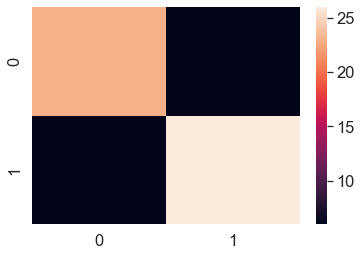

In [17]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

# *4 Classification report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [19]:
#write precision and recall become valuable
disease_true= np.zeros(10000)
disease_true[0]=1  #only one positive case

disease_preds =np.zeros(10000)   #only one pridicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
